In [32]:
import pandas as pd 

In [132]:
from sklearn.metrics import accuracy_score,accuracy_score,f1_score,matthews_corrcoef,confusion_matrix,roc_curve,auc
def evalution_metrics(test_label, labels_score, save=False, txt_name=None, path = './'):
    accuracy = accuracy_score(test_label, labels_score.round())
    confusion = confusion_matrix(test_label, labels_score.round())
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    precision = TP / float(TP + FP)
    sensitivity = TP / float(FN + TP)
    specificity = TN / float(TN + FP)
    f1 = f1_score(test_label, labels_score.round())
    mcc = matthews_corrcoef(test_label, labels_score.round())
    # precision TP / (TP + FP)
    # recall: TP / (TP + FN)
    # specificity : TN / (TN + FP)
    # f1: 2 TP / (2 TP + FP + FN)
    metrics = [accuracy,precision,sensitivity,specificity,f1,mcc]
    columns=['accuracy', 'precision', 'sensitivity', 'specificity', 'f1', 'mcc']
    metrics_dict = dict(zip(columns,metrics))
    if save:
        df = pd.DataFrame(metrics_dict,index=[0])
        df.to_csv(path+'%s_metrics.csv'%txt_name)
        print('  # Accuracy: %f' % accuracy+'\n')
        print('  # Precision: %f' % precision+'\n')  
        print('  # Sensitivity/Recall: %f' % sensitivity+'\n')
        print('  # Specificity: %f' %specificity+'\n')
        print('  # F1 score: %f' % f1+'\n')
        print('  # Matthews Corrcoef:%f' % mcc+'\n')
    else:
        return(metrics_dict)

In [33]:
TWB2_hearing_loss_phenotype_data = pd.read_csv('TWB2_hearing_loss_phenotype_data')

In [159]:
TWB2_hearing_loss_phenotype_data

,TWB2_ID,AGE,I_32,hear_losing
0,TV2A_20190903G,37.0,0.0,0
1,TV29_20181601H,51.0,50.0,1
2,TV2A_20191203C,47.0,25.0,1
3,TV2K_20192407A,34.0,0.0,0
4,TV2K_20192403E,46.0,0.0,0
...,...,...,...,...
5692,TV2K_20190506D,60.0,0.0,0
5693,TV20_20180903G,47.0,25.0,1
5694,TV2K_20190802C,55.0,0.0,0
5695,TV2R_20201701F,59.0,0.0,0


In [40]:
import random
random.seed(10) 
normal_data = TWB2_hearing_loss_phenotype_data[TWB2_hearing_loss_phenotype_data['hear_losing']==0]
case_data = TWB2_hearing_loss_phenotype_data[TWB2_hearing_loss_phenotype_data['hear_losing']==1]
normal_data_sampled = normal_data.loc[random.sample(list(normal_data.index),len(case_data))]
len(normal_data),len(case_data),len(normal_data_sampled)

(3844, 1853, 1853)

In [44]:
all_data = pd.concat([case_data,normal_data_sampled])

In [106]:
from sklearn.model_selection import train_test_split
train_data, test_data, train_labels, test_labels = train_test_split(all_data,all_data['hear_losing'],test_size=0.1,stratify=all_data['hear_losing'])


In [178]:
import numpy as np
x_train = np.array(train_data['AGE']).reshape(-1,1)
y_train = np.array(train_data['hear_losing'])
x_test = np.array(test_data['AGE']).reshape(-1,1)
y_test = np.array(test_data['hear_losing'])
len(x_train),len(x_test)

(3335, 371)

In [136]:
from sklearn.svm import SVC
model = SVC()
model.fit(x_train,y_train)
labels_score = model.predict(x_test)

In [137]:
evalution_metrics(test_labels, labels_score)

{'accuracy': 0.5795148247978437,
 'precision': 0.5627705627705628,
 'sensitivity': 0.7027027027027027,
 'specificity': 0.45698924731182794,
 'f1': 0.625,
 'mcc': 0.16472342079865818}

In [138]:
from sklearn.model_selection import GridSearchCV

In [145]:
param_grid = {'C':[0.1,1,10],'kernel':['linear', 'poly', 'rbf']}
grid = GridSearchCV(SVC(),param_grid,verbose=3)              

In [ ]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ..............C=0.1, kernel=linear;, score=0.549 total time=   0.3s
[CV 2/5] END ..............C=0.1, kernel=linear;, score=0.598 total time=   0.2s
[CV 3/5] END ..............C=0.1, kernel=linear;, score=0.565 total time=   0.2s
[CV 4/5] END ..............C=0.1, kernel=linear;, score=0.568 total time=   0.2s
[CV 5/5] END ..............C=0.1, kernel=linear;, score=0.558 total time=   0.2s
[CV 1/5] END ................C=0.1, kernel=poly;, score=0.544 total time=   0.9s
[CV 2/5] END ................C=0.1, kernel=poly;, score=0.585 total time=   0.8s
[CV 3/5] END ................C=0.1, kernel=poly;, score=0.558 total time=   0.9s
[CV 4/5] END ................C=0.1, kernel=poly;, score=0.549 total time=   0.7s
[CV 5/5] END ................C=0.1, kernel=poly;, score=0.532 total time=   0.7s
[CV 1/5] END .................C=0.1, kernel=rbf;, score=0.543 total time=   0.3s
[CV 2/5] END .................C=0.1, kernel=rbf;,

In [148]:
grid.best_estimator_

SVC(C=0.1, kernel='linear')

In [155]:
labels_score = grid.predict(x_test)

In [170]:
 e = evalution_metrics(test_labels, labels_score)

In [174]:
df = pd.DataFrame(e,index=['grid_cv'])

In [175]:
dfa = pd.DataFrame(a,index=['defult'])

In [177]:
pd.concat([dfa,df])

,accuracy,precision,sensitivity,specificity,f1,mcc
defult,0.579515,0.562771,0.702703,0.456989,0.625000,0.164723
grid,0.579515,0.566210,0.670270,0.489247,0.613861,0.162184


In [180]:
import matplotlib.pyplot as plt
import seaborn as sns

In [188]:
TWB2_hearing_loss_phenotype_data

,TWB2_ID,AGE,I_32,hear_losing
0,TV2A_20190903G,37.0,0.0,0
1,TV29_20181601H,51.0,50.0,1
2,TV2A_20191203C,47.0,25.0,1
3,TV2K_20192407A,34.0,0.0,0
4,TV2K_20192403E,46.0,0.0,0
...,...,...,...,...
5692,TV2K_20190506D,60.0,0.0,0
5693,TV20_20180903G,47.0,25.0,1
5694,TV2K_20190802C,55.0,0.0,0
5695,TV2R_20201701F,59.0,0.0,0


In [192]:
TWB2_hearing_loss_phenotype_data_gb = TWB2_hearing_loss_phenotype_data.groupby(['AGE', 'I_32']).size().reset_index(name='Count')

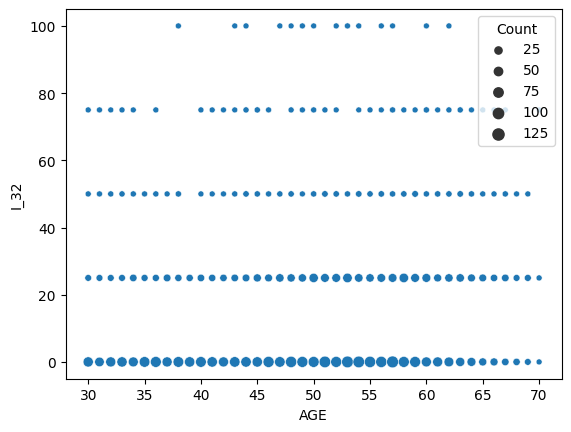

In [205]:
sns.scatterplot(data=TWB2_hearing_loss_phenotype_data_gb, x='AGE', y='I_32', size='Count')
plt.show()